In [39]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('datasets/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# check duplicate 
df.duplicated().sum()

0

In [9]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [15]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [19]:
X_train.shape

(8000, 11)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [21]:
X_train_trf

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [64]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim = 11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\kapil\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
history = model.fit(X_train_trf, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7839 - loss: 0.5444 - val_accuracy: 0.7975 - val_loss: 0.4748
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7939 - loss: 0.4652 - val_accuracy: 0.8037 - val_loss: 0.4477
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8038 - loss: 0.4350 - val_accuracy: 0.8087 - val_loss: 0.4320
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8056 - loss: 0.4310 - val_accuracy: 0.8125 - val_loss: 0.4227
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8192 - loss: 0.4157 - val_accuracy: 0.8156 - val_loss: 0.4149
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8328 - loss: 0.4035 - val_accuracy: 0.8250 - val_loss: 0.4066
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8409 - loss: 0.3875 - val_accuracy: 0.8275 - val_loss: 0.3962
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8397 - loss: 0.3895 - val_accu

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3274 - val_accuracy: 0.8544 - val_loss: 0.3452
Epoch 52/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8739 - loss: 0.3118 - val_accuracy: 0.8531 - val_loss: 0.3451
Epoch 53/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8614 - loss: 0.3336 - val_accuracy: 0.8531 - val_loss: 0.3457
Epoch 54/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8679 - loss: 0.3304 - val_accuracy: 0.8519 - val_loss: 0.3462
Epoch 55/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8699 - loss: 0.3206 - val_accuracy: 0.8500 - val_loss: 0.3479
Epoch 56/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8630 - loss: 0.3230 - val_accuracy: 0.8531 - val_loss: 0.3461
Epoch 57/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8659 - loss: 0.3246 - val_accuracy: 0.8512 - val_loss: 0.3461
Epoch 58/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8577 - loss: 0.3344 - val_accuracy:

In [68]:
model.layers[1].get_weights()

[array([[ 4.17593479e-01,  3.83165568e-01,  4.99657802e-02,
          6.04665935e-01, -8.22150588e-01, -3.04242760e-01,
         -4.65040684e-01,  5.38844168e-01,  3.12807024e-01,
          3.04504484e-01,  3.02790105e-01],
        [ 3.65243852e-01,  3.32655430e-01, -6.20407820e-01,
         -5.96282899e-01,  3.63414764e-01,  4.14637089e-01,
          9.17851850e-02,  1.86392725e-01, -5.74789345e-01,
          7.20155239e-01, -7.48131454e-01],
        [ 3.12390506e-01, -5.10678394e-04, -1.19819529e-01,
          3.90846968e-01,  3.80926460e-01, -3.25966656e-01,
          8.33117068e-01,  2.78430860e-02,  4.87439990e-01,
          9.18003544e-02, -2.28957068e-02],
        [-6.92624867e-01, -5.69160134e-02, -1.40630245e+00,
         -2.59779751e-01, -6.18156075e-01,  1.15465987e+00,
         -1.31091652e-02,  1.08209670e+00, -5.71191430e-01,
         -7.59951234e-01, -5.68070531e-01],
        [ 1.31476462e-01, -1.35837388e+00, -2.99979746e-01,
          2.54805475e-01,  5.00407577e-01, -

In [69]:
y_pred = model.predict(X_test_trf)
y_pred = np.where(y_pred > 0.5, 1, 0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [70]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8605

In [72]:
import matplotlib.pyplot as plt

In [73]:
history.history

{'accuracy': [0.7920312285423279,
  0.7987499833106995,
  0.8043749928474426,
  0.8112499713897705,
  0.8185937404632568,
  0.8299999833106995,
  0.836718738079071,
  0.8435937762260437,
  0.8498437404632568,
  0.8539062738418579,
  0.8556249737739563,
  0.8578125238418579,
  0.8592187762260437,
  0.859375,
  0.8606250286102295,
  0.8609374761581421,
  0.8628125190734863,
  0.8618749976158142,
  0.8614062666893005,
  0.8623437285423279,
  0.8634374737739563,
  0.8645312786102295,
  0.8646875023841858,
  0.8631250262260437,
  0.8629687428474426,
  0.8646875023841858,
  0.8648437261581421,
  0.8643749952316284,
  0.8648437261581421,
  0.8642187714576721,
  0.8639062643051147,
  0.864062488079071,
  0.8635937571525574,
  0.8648437261581421,
  0.8651562333106995,
  0.8657812476158142,
  0.8654687404632568,
  0.8645312786102295,
  0.8650000095367432,
  0.8659374713897705,
  0.8656250238418579,
  0.8665624856948853,
  0.8670312762260437,
  0.8665624856948853,
  0.8659374713897705,
  0.864843

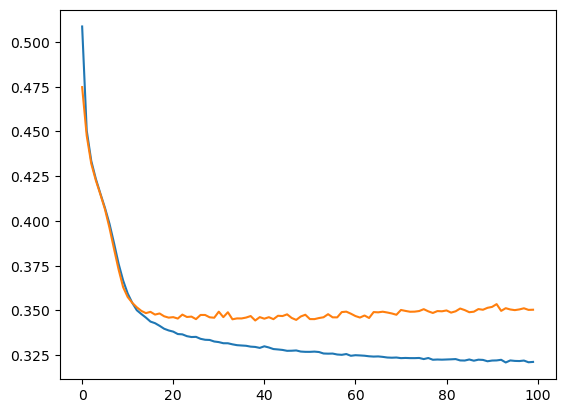

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])